# Monte Carlo Simulation for FE
## IEOR 4703

### Metropolis-Hastings

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [8]:
mu1 = 0
mu2 = 0
mu = np.array([mu1, mu2])

rho = 0.5

Rho = np.array([[1.0, rho], [rho, 1.0]])

sigma = np.eye(2)

# covariance matrix
Sigma = np.dot(sigma, np.dot(Rho, sigma))

theta_0 = np.array([2., 2.])

n_iters = 500
theta_array = np.zeros([n_iters + 1, 2])

# keep track of acceptance and rejection
indicators = np.zeros(n_iters + 1)
indicators[0] = 1 # special value

theta_array[0] = theta_0

sig = 0.01

# multivariate normal
mvn = multivariate_normal(mu, Sigma)

for i in range(1, n_iters + 1):
    
    thetaP = theta_array[i - 1] + sig * np.random.randn(2)
    
    # Metropolis Ratio
    q = np.minimum(1.0, mvn.pdf(thetaP) / mvn.pdf(theta_array[i - 1]))
    if np.random.rand() < q:
        # accept
        theta_array[i] = thetaP
        indicators[i] = 1
    else:
        # reject
        theta_array[i] = theta_array[i - 1]

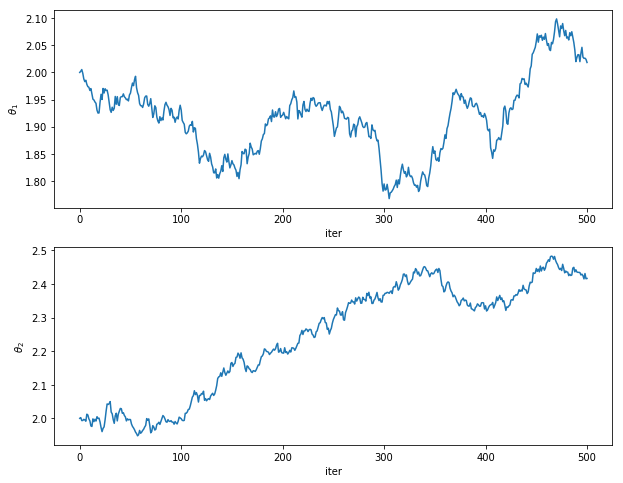

In [9]:
plt.figure(figsize=[10,8])
plt.subplot(2, 1, 1)
plt.plot(theta_array[:, 0])
plt.xlabel('iter')
plt.ylabel(r'$\theta_1$')
plt.subplot(2, 1, 2)
plt.plot(theta_array[:, 1])
plt.xlabel('iter')
plt.ylabel(r'$\theta_2$')
plt.show()

In [10]:
xx = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(xx, xx)
pos = np.empty(X.shape + (2,))
pos[:,:,0] = X; pos[:,:,1] = Y
P = mvn.pdf(pos)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, P, cmap=cm.coolwarm, linewidth=0, antialiased=False)

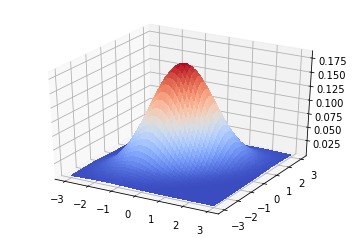

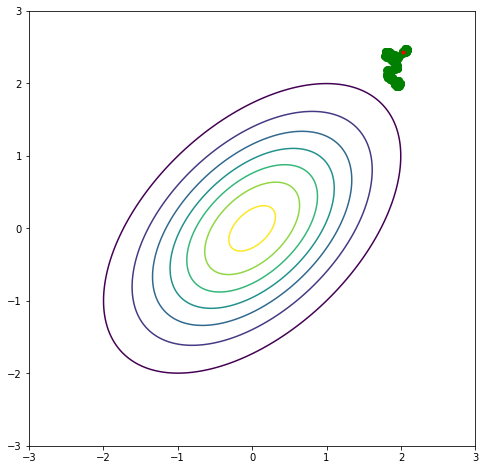

In [11]:
thetaAccepted = theta_array[indicators == 1]
thetaRejected = theta_array[indicators == 0]

plt.figure(figsize=(8,8))
plt.contour(X, Y, P)
plt.plot(thetaAccepted[:,0], thetaAccepted[:,1], 'go-')
plt.plot(thetaRejected[:,0], thetaRejected[:,1], 'r.-')
plt.show()

Fraction of accepted proposals

In [6]:
np.mean(indicators)

0.9920159680638723